- Simple Moving average
- Cumulative moving average
- Exponential Weight Moving average
- Moving Average ACF
- Auto Regressive Model PACF

In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
df_tesla = pd.read_csv("datasets/Tesla.csv")

In [3]:
df_tesla.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN


In [4]:
df_tesla.set_index('date', inplace=True)
if df_tesla.index.dtype == 'object':
    print("Changed")
    df_tesla.index = pd.to_datetime(df_tesla.index)

Changed


<Axes: xlabel='date'>

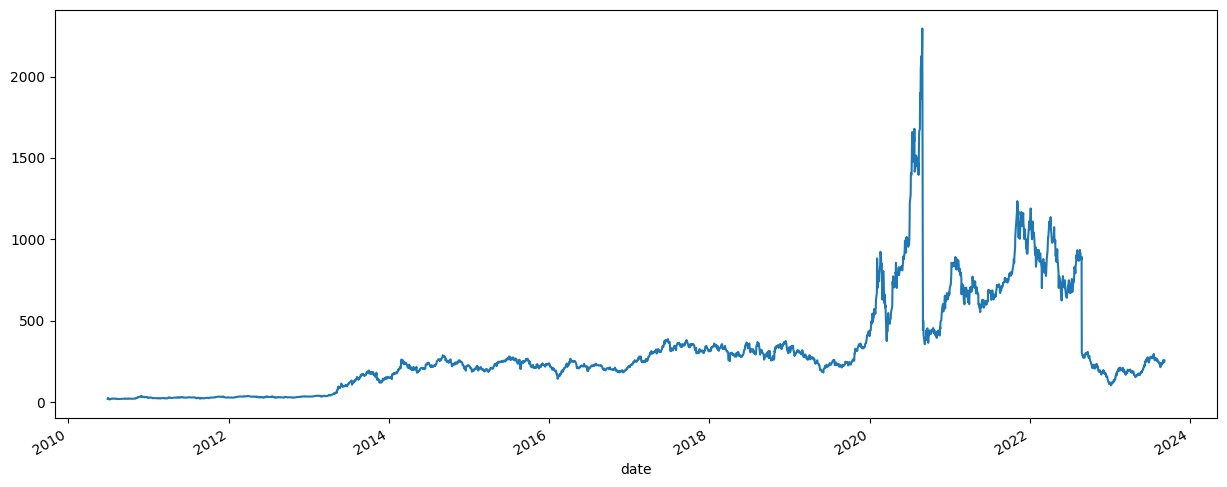

In [5]:
#Simple Moving Average
df_tesla["open"].plot(figsize=(15,6))

In [6]:
df_tesla["Open 10 days Rolling"] = df_tesla['open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='date'>

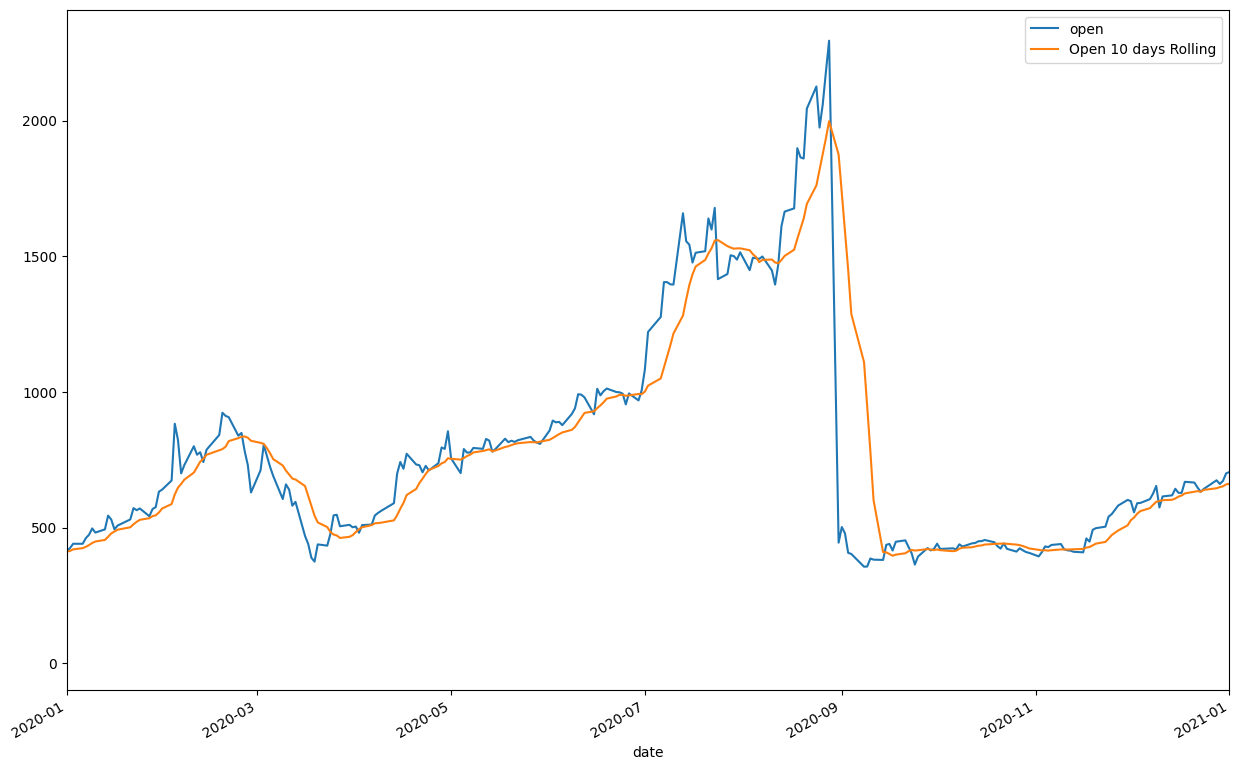

In [7]:
df_tesla[["open", "Open 10 days Rolling"]].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 10))

In [8]:
df_tesla["Open 30 days Rolling"] = df_tesla['open'].rolling(window=30, min_periods=1).mean()
df_tesla["Open 50 days Rolling"] = df_tesla['open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='date'>

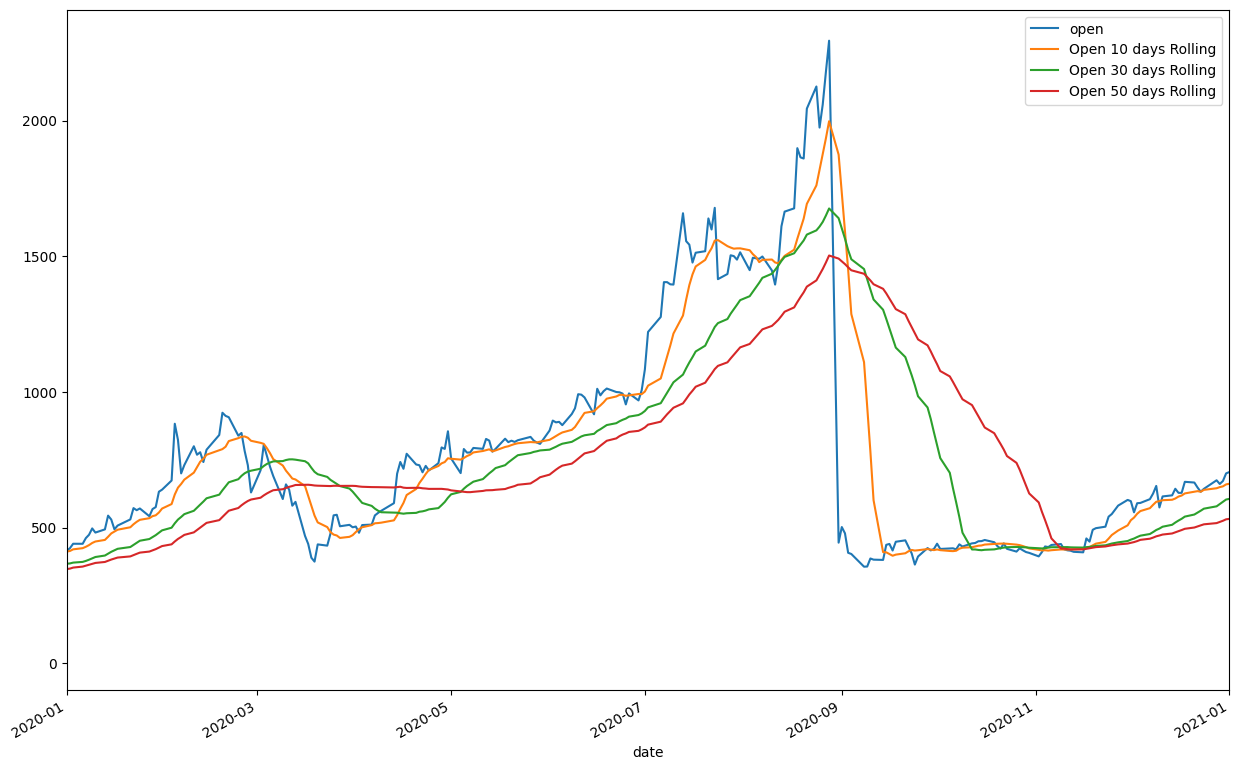

In [9]:
df_tesla[["open", "Open 10 days Rolling", "Open 30 days Rolling", "Open 50 days Rolling"]].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15, 10))

Disadvantages of using Simple Moving Average:

1. Lag in Response to Changes: Simple Moving Averages (SMA) give equal weight to all data points within the specified window, which means they can be slow to respond to sudden changes or trends in the data. This lag can result in delayed signals for decision-making, especially in fast-moving markets.

2. Smoothing Effect: While smoothing is a benefit in some cases, it can also be a disadvantage. SMAs can smooth out important short-term fluctuations, making it challenging to capture and react to rapid market fluctuations or short-term opportunities.

3. Susceptible to Outliers: SMAs are sensitive to outliers or extreme values within the data. A single extreme data point can significantly influence the SMA, potentially leading to inaccurate or misleading results, particularly in datasets with occasional anomalies.

<Axes: xlabel='date'>

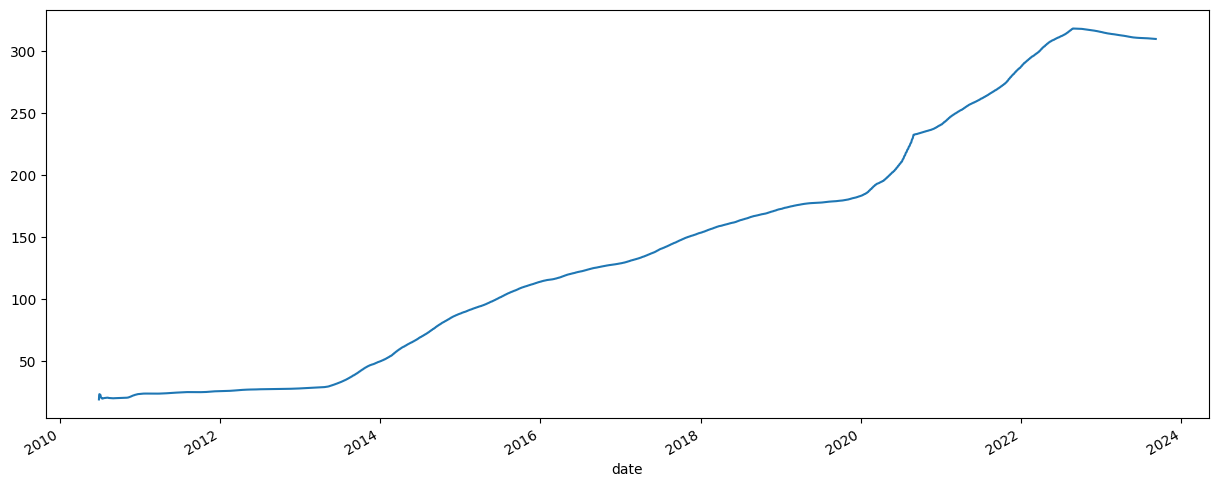

In [10]:
# Cumulative Moving Average
df_tesla["open"].expanding().mean().plot(figsize=(15,6))

Exponential Moving Average: In this case the weights are not assigned yet. The focus is on using the exponential effect to do the smoothening part


`Formula: ((column - Prev EMA) * multiplier) + Prev EMA`

`multiplier = 2/(EMA Rolling window+1)`

In [11]:
df_tesla["EMA_0.1"] = df_tesla["open"].ewm(alpha=0.1, adjust=False).mean()

<Axes: xlabel='date'>

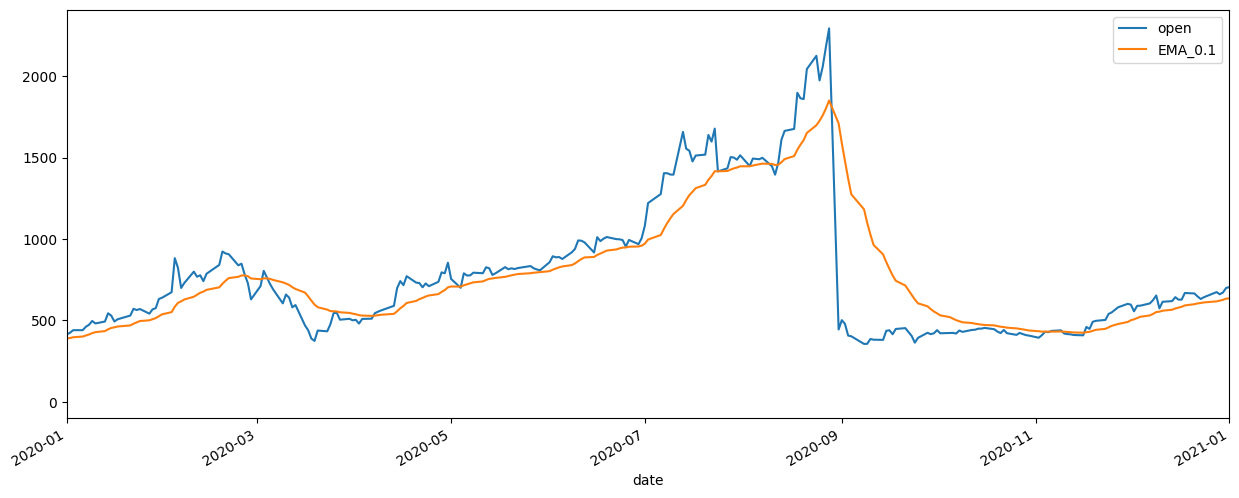

In [12]:
df_tesla[['open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

<Axes: xlabel='date'>

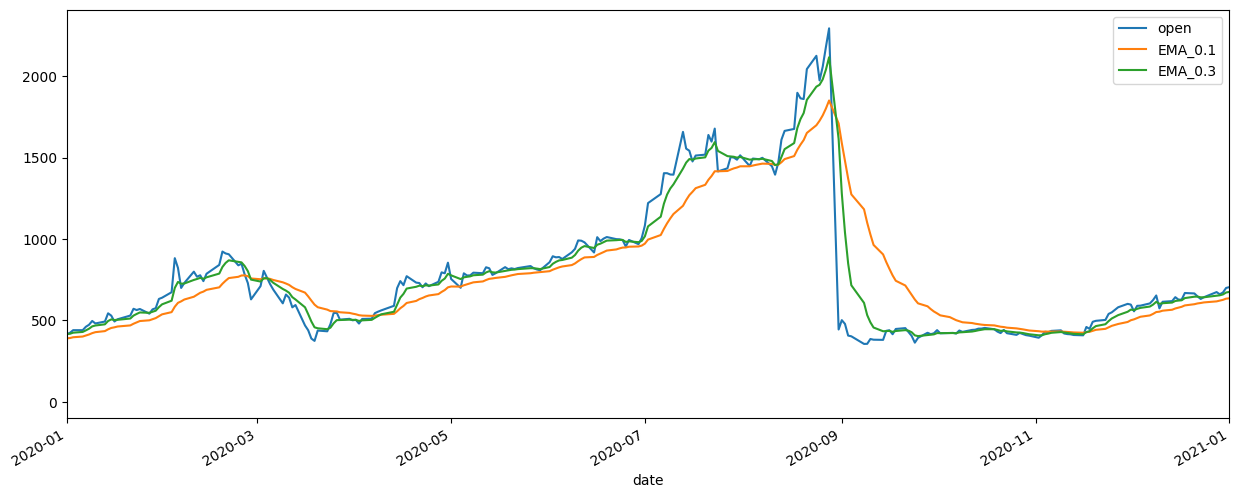

In [13]:
df_tesla["EMA_0.3"] = df_tesla["open"].ewm(alpha=0.3, adjust=False).mean()
df_tesla[['open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

Exponential Weighted Moving Average: The focus should be more on the recent data, so that we can do the projection properly

```
Forumula: 

EWMA(t) = a*x(t) + (1-a)*EWMA(t-1)

- (a) is the weight given to the current data
- (a-1) is the difference weight given to the previous data
- This is done to prevent the lags
```


In [14]:
df_tesla["EWMA_5 days"] = df_tesla['open'].ewm(span=5).mean()

<Axes: xlabel='date'>

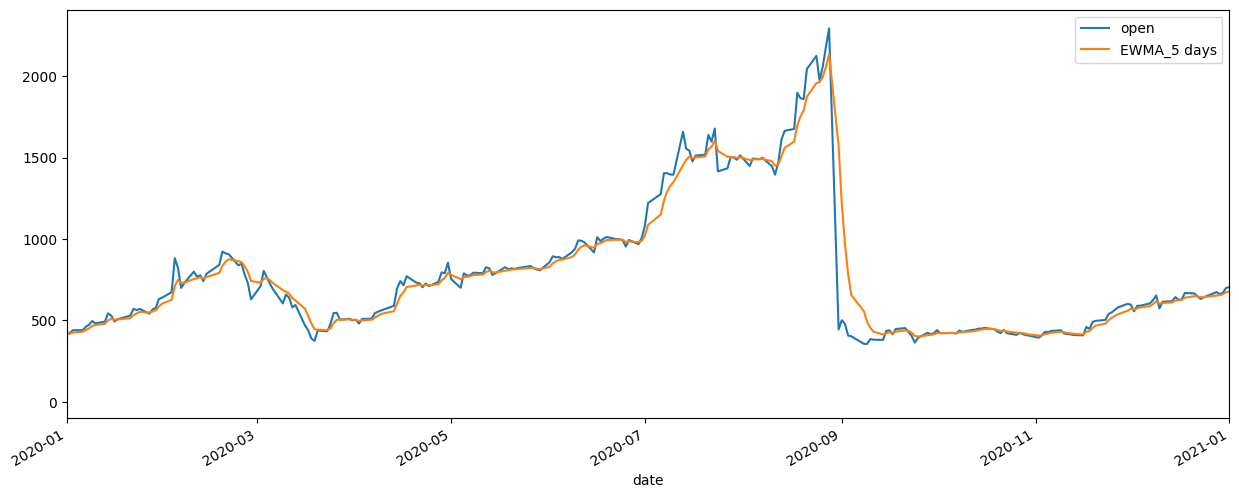

In [15]:
df_tesla[['open', 'EWMA_5 days']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

<Axes: xlabel='date'>

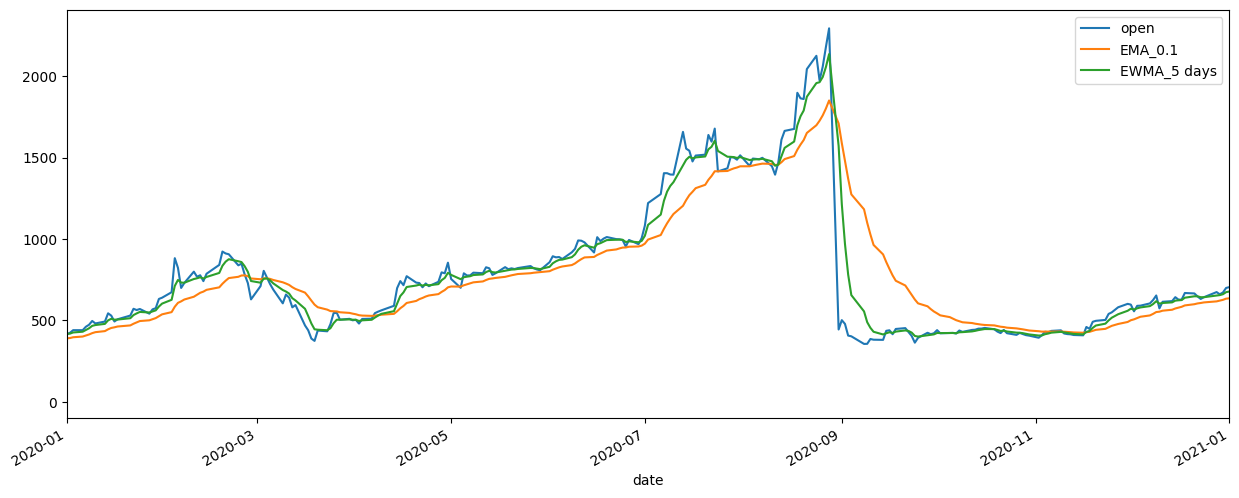

In [16]:
df_tesla[['open', 'EMA_0.1','EWMA_5 days']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

`ARIMA = AR + I + MA`

- `AR` is the Auto Regressive Model
- `I`?
- `MA` is the Moving Average Model
- `moving_average_hat` - This is the predicted `Moving Average` - Predicted value
- `moving_average_actual` - This is the actual `Moving Average` - Actual value
- `t` - This is `at the given time instance`
- `E_t` - Error rate = `Moving Average actual` - `Moving Average Predicted`

- `moving_average_hat` = 




In [17]:
#To be Continued